In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from diagnostics import lm_plots

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `np.random.seed(1)` prior to starting part (a) to ensure consistent results.

In [2]:
np.random.seed(1)

__(a) Using the `np.random.normal()` function, create a vector, x, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.__

In [3]:
x1 = np.random.normal(size=100)

__(b) Using the `np.random.normal()` function, create a vector, `eps`, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.__

In [4]:
eps = np.random.normal(scale=0.25, size=100)

__(c) Using x and eps, generate a vector y according to the model:__
```
Y = −1 + 0.5X + ε
```
__What is the length of the vector y? What are the values of β0 and β1 in this linear model?__

In [5]:
B0 = -1
B1 = 0.5
y = B0 + (B1 * x1) + eps

print('length of y = {}'.format(len(y)))
print('B0 = {}'.format(B0))
print('B1 = {}'.format(B1))

length of y = 100
B0 = -1
B1 = 0.5


__(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.__

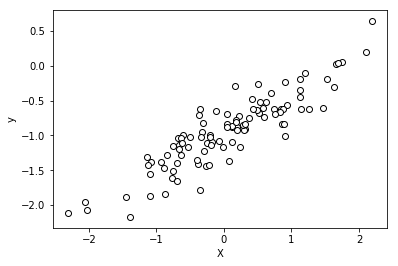

In [6]:
plt.scatter(x1, y, **scatter_kw);
plt.xlabel('X')
plt.ylabel('y');

_Comments_:
 
 - There's a linear relationship between `X` and `y`
 - Noise seems to be distributed normally

__(e)  Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?__

In [7]:
model = sm.OLS(y, sm.add_constant(x1)).fit()
b_hat_0, b_hat_1 = model.params

print('B^0 = {}, B^1 = {}'.format(b_hat_0, b_hat_1))

B^0 = -0.9632466175754496, B^1 = 0.523856783412793


_Comments:_

 - Both estimates are close to their true values (-1 and 0.5)

__(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. create an appropriate legend.__

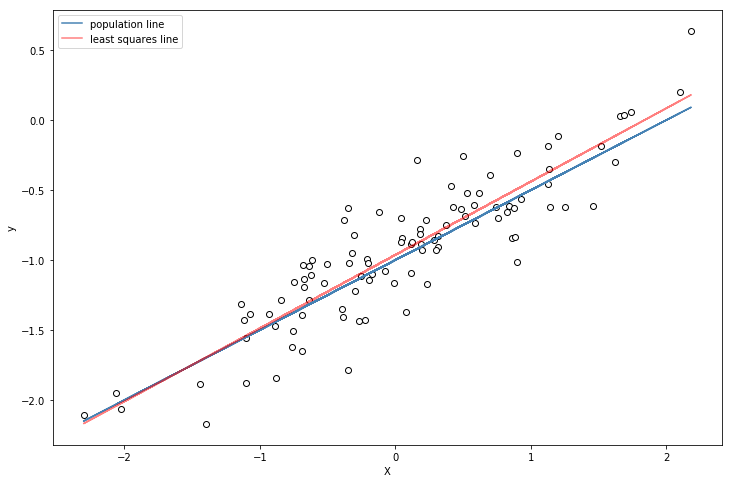

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(x1, y, **scatter_kw);
pop_line = [-1 + 0.5 * x for x in x1]
lsq_line = [b_hat_0 + b_hat_1 * x for x in x1]
plt.plot(x1, pop_line, color='steelblue', label='population line')
plt.plot(x1, lsq_line, **line_kw, label='least squares line')
plt.plot()
plt.legend()
plt.xlabel('X')
plt.ylabel('y');

__(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.__

In [9]:
x2 = np.square(x1)
data = pd.DataFrame({'x1': x1, 'x2': x2, 'const': np.ones(len(x1))})
model_2 = sm.OLS(y, data).fit()

print('R2 improvement = {}'.format(model_2.rsquared - model.rsquared))
b2_low, b2_high = model_2.conf_int().loc['x2']
b2_includes_zero = b2_low < 0 and b2_high > 0
print('B^2 includes zero = {}'.format(b2_includes_zero))

R2 improvement = 6.784944119431202e-05
B^2 includes zero = True


_Comments:_

   - There is minimal improvement in R2
   - B^2 confidence interval includes zero
   - We cannot conclude there's a relation between X2 and the response
   - The model doesn't seem to improve

__(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.__

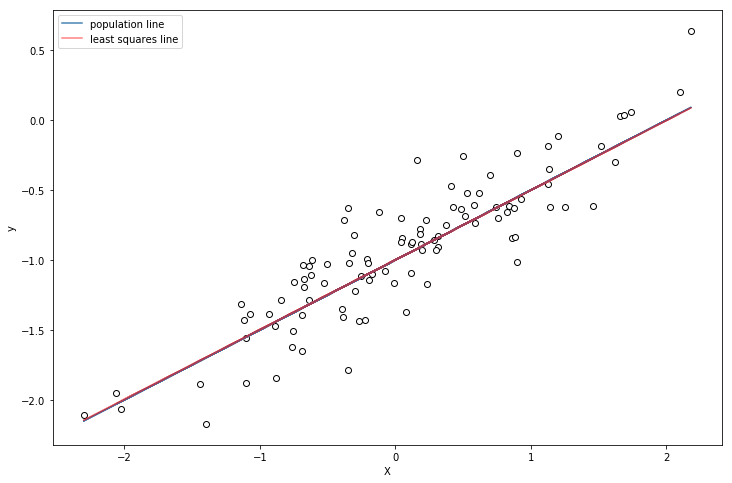

In [10]:
clean_eps = np.random.normal(scale=0.05, size=100)
clean_y = B0 + (B1 * x1) + clean_eps

clean_model = sm.OLS(clean_y, sm.add_constant(x1)).fit()

plt.figure(figsize=(12, 8))
plt.scatter(x1, y, **scatter_kw);
pop_line = [-1 + 0.5 * x for x in x1]
lsq_line = [clean_model.params[0] + clean_model.params[1] * x for x in x1]
plt.plot(x1, pop_line, color='steelblue', label='population line')
plt.plot(x1, lsq_line, **line_kw, label='least squares line')
plt.plot()
plt.legend()
plt.xlabel('X')
plt.ylabel('y');

_Comments:_

 * Population and regression line get  close as error decreases

__(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.__

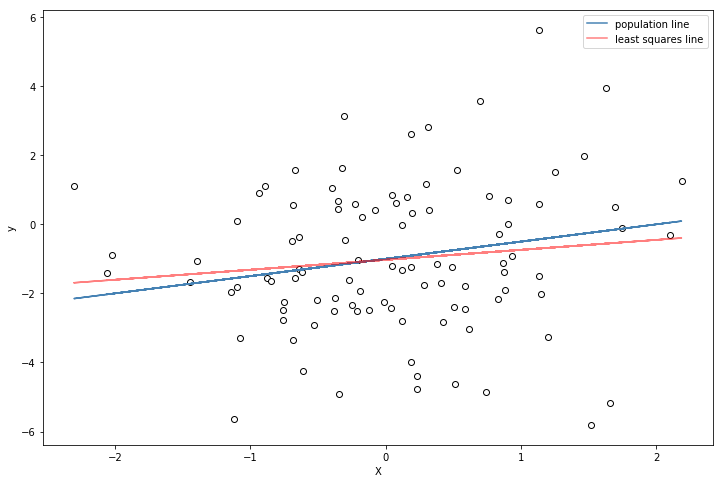

In [11]:
noisy_eps = np.random.normal(scale=2, size=100)
noisy_y = B0 + (B1 * x1) + noisy_eps

noisy_model = sm.OLS(noisy_y, sm.add_constant(x1)).fit()

plt.figure(figsize=(12, 8))
plt.scatter(x1, noisy_y, **scatter_kw);
pop_line = [-1 + 0.5 * x for x in x1]
lsq_line = [noisy_model.params[0] + noisy_model.params[1] * x for x in x1]
plt.plot(x1, pop_line, color='steelblue', label='population line')
plt.plot(x1, lsq_line, **line_kw, label='least squares line')
plt.plot()
plt.legend()
plt.xlabel('X')
plt.ylabel('y');

_Comments:_

* Regression line and population line get far apart as error increases

__(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.__

In [25]:
def display_confidence_interval(conf_int):
    b0 = conf_int[0]
    b1 = conf_int[1]
    print('B0 is ({:.2f}, {:.2f}) / B1 is ({:.2f}, {:.2f})'.format(b0[0], b0[1], b1[0], b1[1]))

display_confidence_interval(model.conf_int())

B0 is (-1.01, -0.92) / B1 is (0.47, 0.58)


In [26]:
display_confidence_interval(clean_model.conf_int())

B0 is (-1.01, -0.99) / B1 is (0.49, 0.51)


In [27]:
display_confidence_interval(noisy_model.conf_int())

B0 is (-1.45, -0.60) / B1 is (-0.19, 0.77)


_Comments:_

 * All intervals contain the true values `-1` and `0.5`
 * As the noise decreases intervals get narrower, as the noise increases intervals get wider
 * In the noisy case the interval is so wide that makes B1 non-significant